In [1]:
#loadin the dataset
import pandas as pd
de=pd.read_csv("/content/crime.csv")
print(de)
#displayin info of the dataset
print("Information about the dataset")
print(de.info())
print('The number of rows and columns')
print(de.shape)


    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0          412.5     5.3  56.0     78.4              272.8      3,609.00   
1          238.4     5.1  38.2     75.2              119.8      2,552.40   
2          667.9     7.8  30.4    157.9              471.8      3,894.10   
3          114.3     2.5  28.2     20.7               63.0      3,208.40   
4          792.6     6.1  63.8    206.7              516.0      4,607.80   
..           ...     ...   ...      ...                ...           ...   
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2     82.3              138.6      1,320.00   
375        231.4    18.0   5.0     66.2              142.2           885   
376         92.1     5.4   4.6     16.1               66.0           420   
377          262    20.6   4.9    157.8               78.7      1,281.20   

     Burglary     Theft  MotorVehicleTheft  \
0         852  2,493.60              263.

Has 378 row and 11 columns

In [35]:
print(de.head())
print(de.tail())

  ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0        412.5     5.3  56.0     78.4              272.8      3,609.00   
1        238.4     5.1  38.2     75.2              119.8      2,552.40   
2        667.9     7.8  30.4    157.9              471.8      3,894.10   
3        114.3     2.5  28.2     20.7               63.0      3,208.40   
4        792.6     6.1  63.8    206.7              516.0      4,607.80   

   Burglary     Theft  MotorVehicleTheft State         City  
0       852  2,493.60              263.4    TX      Abilene  
1     575.3  1,853.00              124.1    OH        Akron  
2  1,099.60  2,652.80              141.7    GA       Albany  
3     484.6  2,476.10              247.7    OR       Albany  
4     883.4  3,047.60              676.9    NM  Albuquerque  
    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2 

The head of the dataset asnd the tails are the same meaning the dataset was copied correctly

In [ ]:
#checkin for data types
print("datatypes of every column")
print(de.dtypes)

ViolentCrime          object
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime         object
Burglary              object
Theft                 object
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object

the two datatypes present are object and float

# Data cleaning


In [2]:
#number of duplicates
print("number of duplicates")
de.duplicated().sum()


number of duplicates


0

There are no duplicates

In [ ]:
#checkin for any empty fields
print("Number of empty fields in each column")
print(de.isnull().sum())
print("Number of empty fields in the whole dataset")
print(de.isnull().sum().sum())



Number of empty fields in each column
ViolentCrime         1
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    1
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64
Number of empty fields in the whole dataset
20


There are 20 emty fields

Violent crime and aggrevated assualt have 1 missing value
Property crime has 6 missing values
Burglary has 4 missing valuwa
Theft has 3 missing values
City has 5 missing values

In [ ]:
#droppin the missin rows
#de_clean=de.dropna()
#de_clean#

We could have used the above code if we wanted to remove the empty fields but we will fill the empty fields using mean and mode as seen below

In [6]:
import numpy as np

# take de as the original dataset and copying to a new dataset
de_clean = de.copy()

# Input missing values for numerical columns using the mean
numerical_cols = de_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    de_clean[col] = de_clean[col].fillna(de_clean[col].mean())

# Input missing values for categorical columns using the mode
categorical_cols = de_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = de_clean[col].mode()[0]
    de_clean[col] = de_clean[col].replace('', np.nan).fillna(mode_val)

# Print the clean dataset
print(de_clean)

    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0          412.5     5.3  56.0     78.4              272.8      3,609.00   
1          238.4     5.1  38.2     75.2              119.8      2,552.40   
2          667.9     7.8  30.4    157.9              471.8      3,894.10   
3          114.3     2.5  28.2     20.7               63.0      3,208.40   
4          792.6     6.1  63.8    206.7              516.0      4,607.80   
..           ...     ...   ...      ...                ...           ...   
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2     82.3              138.6      1,320.00   
375        231.4    18.0   5.0     66.2              142.2           885   
376         92.1     5.4   4.6     16.1               66.0           420   
377          262    20.6   4.9    157.8               78.7      1,281.20   

     Burglary     Theft  MotorVehicleTheft  \
0         852  2,493.60              263.

We have now filled any empty fields

In [7]:
#checkin for missin marks in the new dataset

print("Number of missin fields in each column")
print(de_clean.isnull().sum())
print("Number of missin fields in the dataset")
print(de_clean.isnull().sum().sum())


Number of missin fields in each column
ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    0
PropertyCrime        0
Burglary             0
Theft                0
MotorVehicleTheft    0
State                0
City                 0
dtype: int64
Number of missin fields in the dataset
0


As you can see we have no epty fields in the cleaned dataset

In [9]:

object_cols = de_clean.select_dtypes(include=['object']).columns

# Iterating through each object-type column
for col in object_cols:
    try:
        # Removing commas and converting to float
        de_clean[col] = de_clean[col].str.replace(',', '').astype(float)
    except ValueError:
        # If conversion to float fails (e.g., non-numeric values), continue to the next column
        continue
object_cols

Index(['ViolentCrime', 'PropertyCrime', 'Burglary', 'Theft', 'State', 'City'], dtype='object')

We convert the object columns into float and remove te commas so as to make it easier to process the data

In [10]:

numerical_columns = de_clean.select_dtypes(include=['float64']).columns
numerical_columns

Index(['ViolentCrime', 'Murder', 'Rape', 'Robbery', 'AggravatedAssault',
       'PropertyCrime', 'Burglary', 'Theft', 'MotorVehicleTheft'],
      dtype='object')

we are collecting the float datatypes in each column whichh is every column cause we change them into float and putting them into the variable numerical columns

In [21]:
#checking for outliers
outliers = de_clean[numerical_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std()).sum()


print("\nOutliers:")
print(outliers)


Outliers:
ViolentCrime         5
Murder               7
Rape                 5
Robbery              7
AggravatedAssault    5
PropertyCrime        1
Burglary             5
Theft                1
MotorVehicleTheft    7
dtype: int64


Violent crime , rape . aggrevated assault , Burgury has 5 outliers
Robbery and Murder and Motervehicle theft have 7 outliers
Theft and propery crime have 1 outliers


Listing the rows with outliers which will be removed and
removing the outliers using the zscore

In [12]:
 #Define the z-score threshold for outlier detection
threshold = 3

# Calculate z-scores for each numerical column
z_scores = de_clean[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Find rows where any z-score exceeds the threshold
outlier_rows = z_scores[(z_scores.abs() > threshold).any(axis=1)]
print(outlier_rows)


     ViolentCrime    Murder      Rape   Robbery  AggravatedAssault  \
4        2.362284  0.450736  1.153129  2.389850           2.003726   
5        3.155782 -0.022126 -0.297678  0.785468           3.902547   
9        3.724694  1.071367  6.371933  2.249050           3.102314   
18       1.058366  0.805382 -0.466853  0.972584           1.059787   
23       1.074920 -0.465434  3.213993 -0.311292           1.094801   
84       2.294412 -1.352050  4.106009  0.833637           2.151080   
94       2.963201  4.351846  0.814779  3.136462           2.455271   
140      2.234265 -0.199450  0.122698  1.189342           2.470590   
177      1.457322 -0.051680  1.117244  0.326015           1.638260   
184      2.485889  0.687166  1.127497  3.618147           1.681299   
211      3.716417  2.046644  0.563579  3.375451           3.449544   
220      1.741502  1.544229 -0.241286  3.484757           0.923375   
224      1.174245  0.805382 -0.579637  1.385722           1.066352   
225      4.389620  3

Droppin the outlier rows

In [22]:
de_filtered=de_clean.drop(outlier_rows.index)
de_filtered

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,412.5,5.3,56.0,78.4,272.8,3609.0,852.0,2493.6,263.4,TX,Abilene
1,238.4,5.1,38.2,75.2,119.8,2552.4,575.3,1853.0,124.1,OH,Akron
2,667.9,7.8,30.4,157.9,471.8,3894.1,1099.6,2652.8,141.7,GA,Albany
3,114.3,2.5,28.2,20.7,63.0,3208.4,484.6,2476.1,247.7,OR,Albany
6,216.5,0.8,28.7,25.5,161.6,1430.2,218.9,1163.6,47.8,PA,Altoona
...,...,...,...,...,...,...,...,...,...,...,...
371,108.7,4.8,3.5,40.5,59.9,710.2,284.5,403.3,22.5,"Aguadilla-Isabela, Puerto Rico M.S.A.",Aguadilla
372,99.3,6.9,2.7,53.1,36.6,1031.9,287.3,670.8,73.8,"Arecibo, Puerto Rico M.S.A.",Arecibo
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6,"Guayama, Puerto Rico M.S.A.",Guayama
374,237.5,11.5,5.2,82.3,138.6,1320.0,377.1,861.6,81.3,"Mayaguez, Puerto Rico M.S.A.",Mayaguez


In [14]:
#summary of the dataset
print("Summary of the dataset ")
print(de_filtered.describe())

Summary of the dataset 
       ViolentCrime      Murder        Rape     Robbery  AggravatedAssault  \
count    350.000000  350.000000  350.000000  350.000000         350.000000   
mean     339.973429    4.196000   40.155714   70.517714         225.539769   
std      150.589208    2.850353   17.142260   44.936832         114.411354   
min       61.600000    0.000000    2.700000    2.300000          25.500000   
25%      231.875000    2.100000   28.425000   35.125000         138.850000   
50%      324.850000    3.600000   37.350000   64.000000         211.050000   
75%      427.150000    5.800000   49.650000   96.700000         293.400000   
max      825.400000   14.200000   91.900000  239.000000         605.200000   

       PropertyCrime    Burglary        Theft  MotorVehicleTheft  
count     350.000000   350.00000   350.000000         350.000000  
mean     2554.165429   513.72200  1862.992286         175.530000  
std       752.195455   204.69914   541.713848         114.403093  
min  


Unique Values in Categorical Columns:
State: 56 unique values
State
TX                                       26
CA                                       25
FL                                       25
PA                                       16
MI                                       14
WA                                       13
GA                                       11
AL                                       11
WI                                       11
IN                                       11
TN                                        9
NC                                        9
OH                                        9
IL                                        9
NY                                        9
VA                                        8
MO                                        8
IA                                        8
OR                                        7
CO                                        6
SC                                        6
MD     

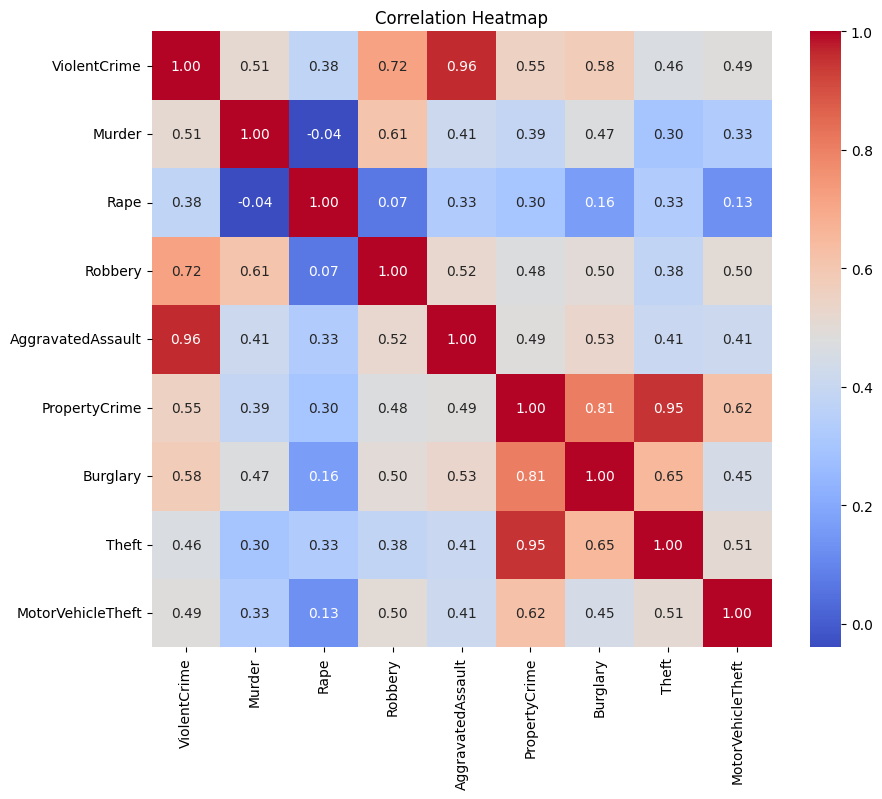

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in de_filtered.select_dtypes(include='object').columns:
    print(f"{col}: {de_filtered[col].nunique()} unique values")
    print(de_filtered[col].value_counts())
    print()

# Correlation matrix for numerical columns
print("\nCorrelation Matrix for Numerical Columns:")
corr_matrix = de_filtered.select_dtypes(include=np.number).corr()
print(corr_matrix)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

